In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 4.1

In [2]:
data = pd.read_csv("TCS.csv", index_col = "Date", parse_dates = True)
data = data.where(data.Series == 'EQ')
data['sma'] = data['Close Price'].rolling(14).mean()
std_ = data.sma.std()
data['upper_band'] = data.sma+2*std_
data['lower_band'] = data.sma-2*std_
data.fillna(data.mean(),inplace = True)

/home/vibe/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


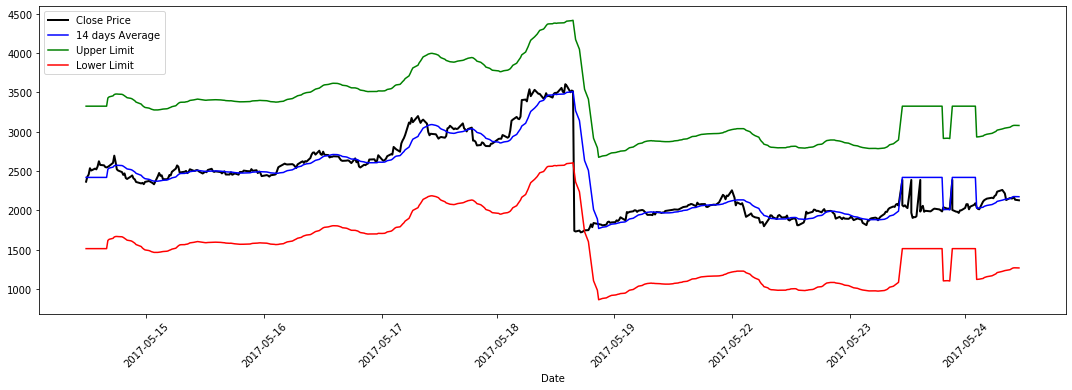

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(data.index, data['Close Price'], 'k', lw=2, label='Close Price')
ax.plot(data.index, data['sma'], 'b', label='14 days Average')
ax.plot(data.index, data['upper_band'], 'g', label='Upper Limit')
ax.plot(data.index, data['lower_band'], 'r', label='Lower Limit')
# ax.fill_between(data.index, data['upper_band'], data['lower_band'], color='#ADCCFF')

ax.set_xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(plt.xticks()[0], data.index.date, rotation=45)
plt.show()

In [4]:
def create_call(df):
    price = df['Close Price']
    if price<df.lower_band:
        return 'Buy'
    elif price<df.sma:
        return 'Hold Buy/ Liquidate Short'
    elif price<df.upper_band:
        return 'Hold Short/ Liquidate Buy'
    else:
        return 'Short'

In [5]:
## creating Call column for TCS data
data['Call'] = data.apply(create_call,axis=1)

### Classification Models

In [6]:
from sklearn.preprocessing import LabelEncoder
X = data[['Close Price','upper_band','sma','lower_band']]
Y = data.Call
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(y_train)

(373, 4) (125, 4) (373,) (125,)
[1 1 1 2 1 2 2 2 0 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 1
 2 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 1 2
 2 1 2 2 1 1 2 2 2 2 1 1 1 2 1 1 1 2 0 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 2 2
 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1
 2 1 1 2 1 1 2 2 1 1 1 2 2 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 1 2 1 2 2 1 1 1
 2 2 2 1 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 1 0 2 2 1 2 2 2 2 1 1 2 2 1 1
 2 2 2 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 2 1 2 1 2
 2 2 1 1 1 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1 1 2 1 1 2 1 2 2 2 2 1 1
 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 2 1 1 1 1 2 2 1 1 2 0 1 1 1 2 1 1 2
 1 1 1 2 2 1 1 1 1 1 1 0 1 1 1 2 2 1 2 2 2 2 2 2 1 1 0 1 2 2 1 2 1 2 2 2 2
 1 2 2]


In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
from sklearn import svm

svm_class = svm.LinearSVC()
svm_class.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [10]:
from sklearn import naive_bayes

naive_class = naive_bayes.GaussianNB()
naive_class.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier()
rf_class.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Comparing Scores of Classifiers

In [13]:
print('Logistic Regression:')
print('Train Score:',log_reg.score(x_train,y_train))
print('Test Score:',log_reg.score(x_test,y_test))
print('\n')

print('KNN Classifier:')
print('Train Score:',knn.score(x_train,y_train))
print('Test Score:',knn.score(x_test,y_test))
print('\n')

print('SVM Classifier:')
print('Train Score:',svm_class.score(x_train,y_train))
print('Test Score:',svm_class.score(x_test,y_test))
print('\n')

print('Naive Bayes:')
print('Train Score:',naive_class.score(x_train,y_train))
print('Test Score:',naive_class.score(x_test,y_test))
print('\n')

print('MLP Classifier:')
print('Train Score:',mlp.score(x_train,y_train))
print('Test Score:',mlp.score(x_test,y_test))
print('\n')

print('Random Forest Classifier:')
print('Train Score:',rf_class.score(x_train,y_train))
print('Test Score:',rf_class.score(x_test,y_test))

Logistic Regression:
Train Score: 1.0
Test Score: 1.0


KNN Classifier:
Train Score: 0.9597855227882037
Test Score: 0.928


SVM Classifier:
Train Score: 0.935656836461126
Test Score: 0.952


Naive Bayes:
Train Score: 0.5549597855227882
Test Score: 0.496


MLP Classifier:
Train Score: 0.7372654155495979
Test Score: 0.632


Random Forest Classifier:
Train Score: 1.0
Test Score: 0.92


### Another Stock using KNN Classifier

In [14]:
ndata = pd.read_csv("MARUTI.csv", index_col = "Date", parse_dates = True)
ndata = ndata.where(ndata.Series == 'EQ')
ndata['sma'] = ndata['Close Price'].rolling(14).mean()
std_ = ndata.sma.std()
ndata['upper_band'] = ndata.sma+2*std_
ndata['lower_band'] = ndata.sma-2*std_
ndata.fillna(ndata.mean(),inplace = True)
ndata.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,upper_band,lower_band
Date,,,,,,,,,,,,,,,,,
2017-05-15,MARUTI,EQ,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356.0,2.286158e+09,31377.0,154743.0,46.01,8101.426656,9827.439305,6375.414007
2017-05-16,MARUTI,EQ,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624.0,4.884174e+09,49047.0,360641.0,50.97,8101.426656,9827.439305,6375.414007
2017-05-17,MARUTI,EQ,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461.0,3.087758e+09,65280.0,260033.0,58.37,8101.426656,9827.439305,6375.414007
2017-05-18,MARUTI,EQ,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814.0,2.794684e+09,37063.0,188907.0,46.44,8101.426656,9827.439305,6375.414007
2017-05-19,MARUTI,EQ,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223.0,3.750475e+09,64293.0,234662.0,42.49,8101.426656,9827.439305,6375.414007


In [15]:
new_x = ndata[['Close Price','upper_band','sma','lower_band']]

In [16]:
ndata['Call'] = log_reg.predict(new_x)

In [17]:
ndata.Call = le.inverse_transform(ndata.Call)

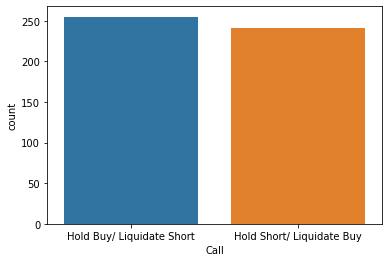

In [18]:
sns.countplot(ndata.Call)

## 4.2

In [19]:
stock = pd.read_csv('HDFC.csv', index_col = "Date", parse_dates = True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2017-05-15 to 2019-05-13
Data columns (total 14 columns):
Symbol                    829 non-null object
Series                    829 non-null object
Prev Close                829 non-null float64
Open Price                829 non-null float64
High Price                829 non-null float64
Low Price                 829 non-null float64
Last Price                829 non-null float64
Close Price               829 non-null float64
Average Price             829 non-null float64
Total Traded Quantity     829 non-null int64
Turnover                  829 non-null float64
No. of Trades             829 non-null int64
Deliverable Qty           829 non-null int64
% Dly Qt to Traded Qty    829 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 97.1+ KB


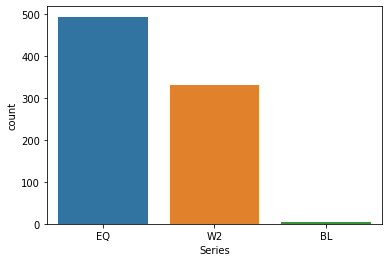

In [20]:
sns.countplot(stock.Series)

In [21]:
stock = stock.where(stock.Series=='EQ')

In [22]:
stock['open_close_%'] = ((stock['Close Price']-stock['Open Price'])/stock['Close Price'])*100
stock['low_high_%'] = ((stock['High Price']-stock['Low Price'])/stock['High Price'])*100
stock['%_change_price'] = stock['Close Price'].pct_change()*100
stock['rolling_mean'] = stock['%_change_price'].rolling(5).mean()
stock['rolling_std'] = stock['%_change_price'].rolling(5).std()

In [23]:
stock['Action'] = 1
for i in range(0,len(stock)-1):
    if stock['Close Price'][i]>stock['Close Price'][i+1]:
        stock['Action'][i] = -1

/home/vibe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [24]:
stock = stock.dropna()
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2017-05-18 to 2019-05-13
Data columns (total 20 columns):
Symbol                    491 non-null object
Series                    491 non-null object
Prev Close                491 non-null float64
Open Price                491 non-null float64
High Price                491 non-null float64
Low Price                 491 non-null float64
Last Price                491 non-null float64
Close Price               491 non-null float64
Average Price             491 non-null float64
Total Traded Quantity     491 non-null float64
Turnover                  491 non-null float64
No. of Trades             491 non-null float64
Deliverable Qty           491 non-null float64
% Dly Qt to Traded Qty    491 non-null float64
open_close_%              491 non-null float64
low_high_%                491 non-null float64
%_change_price            491 non-null float64
rolling_mean              491 non-null float64
rolling_std               491 no

In [25]:
model = RandomForestClassifier()
x = stock[['open_close_%','low_high_%','rolling_mean','rolling_std']]
y = stock.Action
train_x, test_x, train_y,test_y = train_test_split(x,y,test_size = 0.25)
model.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
print('train score:',model.score(train_x,train_y))
print('test score:',model.score(test_x,test_y))

train score: 0.9918478260869565
test score: 0.8536585365853658


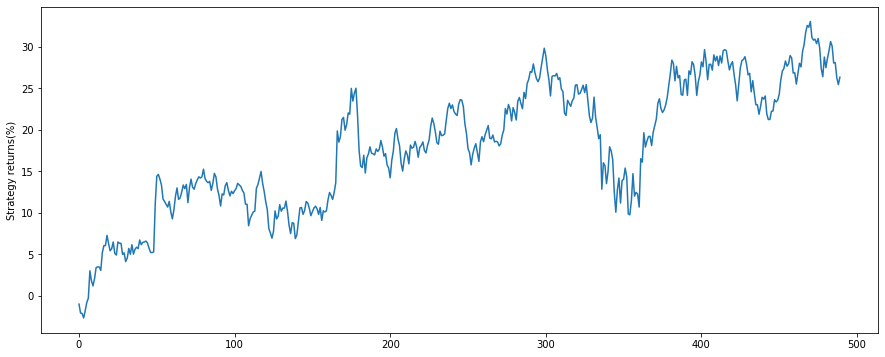

In [27]:
returns_perc = []
for i in range(1, len(stock)):
    returns_perc.append(np.sum(stock['%_change_price'][:i]))

fig, ax  = plt.subplots(figsize=(15, 6))
ax.plot(range(len(returns_perc)), returns_perc)
ax.set_ylabel('Strategy returns(%)')
plt.show()